Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
# Loading dataset
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
# Display the top few rows of the DataFrame
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#Dropping Unnecessary Column:
df = df.drop('ID#', axis=1)

In [5]:
# Renaming Column:
df = df.rename(columns={"Award?": "Award_status"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award_status       3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


Inference drawn from the above info:

- The dataset is complete with 3999 entries and no missing values.
- The dataset contains integer values.
- The dataset contains information about passengers in an airline's frequent flyer program, including their ID#, miles balance, qualifying miles, credit card miles, bonus miles, bonus transactions, flight miles in the past 12 months, flight transactions in the past 12 months, days since enrollment, and whether they had an award flight.
- The dataset can be used to identify passenger segments for targeted mileage offers.

In [7]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_status
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


Inference drawn from above:

 - Substantial variation in mileage balances, many passengers with 0 qualifying miles
 - Average of 11.60 non-flight bonus transactions in the past year
 - Average of 460 flight miles flown in the past year, wide range
 - Average of 1.37 flight transactions in the past year, max of 53
 - Average of 4,119 days since enrolling in frequent flyer program
 - About 37% of passengers received award flights

In [8]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3876     1000           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3876            0                  0                0               1597   

      Award_status  
3876             0  


In [9]:
# Remove the duplicate row
df = df.drop_duplicates()

# Verify that the duplicate has been removed
print("Duplicate removed. New DataFrame shape:", df.shape)

Duplicate removed. New DataFrame shape: (3998, 11)


In [10]:
# Calculate the Z-scores for each column
z_scores = np.abs(stats.zscore(df))

# Define a threshold to identify outliers (e.g., Z-score > 3)
threshold = 3

# Identify outliers for each column
outliers_zscore = (z_scores > threshold)

# Calculate the percentage of outliers for each column
percentage_outliers_zscore = (outliers_zscore.sum(axis=0) / len(df)) * 100

# Print the percentage of outliers for each column
print("Percentage of outliers using Z-score method in each column:")
print(percentage_outliers_zscore)


Percentage of outliers using Z-score method in each column:
Balance              1.875938
Qual_miles           2.076038
cc1_miles            0.000000
cc2_miles            1.075538
cc3_miles            0.450225
Bonus_miles          1.800900
Bonus_trans          1.175588
Flight_miles_12mo    1.950975
Flight_trans_12      2.276138
Days_since_enroll    0.000000
Award_status         0.000000
dtype: float64


Hierarchical clustering methods, such as Ward's linkage, can be less sensitive to outliers because they consider the variance within clusters. K-means clustering is sensitive to outliers because it minimizes the sum of squared distances. DBSCAN is robust to outliers and can automatically classify outliers as noise points. Thus, we can skip the treatment of outliers, as 2 out of these 3 methods are less or not sensitive to outliers.

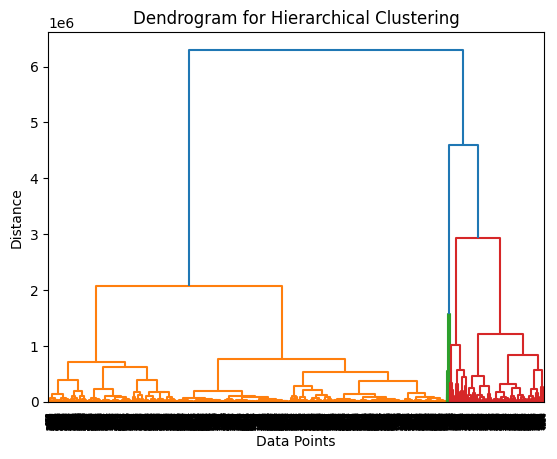

In [11]:
# Perform hierarchical clustering (e.g., using Ward's linkage)
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram for Hierarchical Clustering')

# Show the dendrogram
plt.show()

Inference drawn:

The above dendrogram shows that the data can be divided into two main clusters, with a few smaller clusters branching off. The two main clusters are well-separated, with a large distance between them. This suggests that the data points in each cluster are more similar to each other than they are to the data points in the other cluster.

In [12]:
# Select the relevant columns for clustering
data_for_clustering = df[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']]

C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

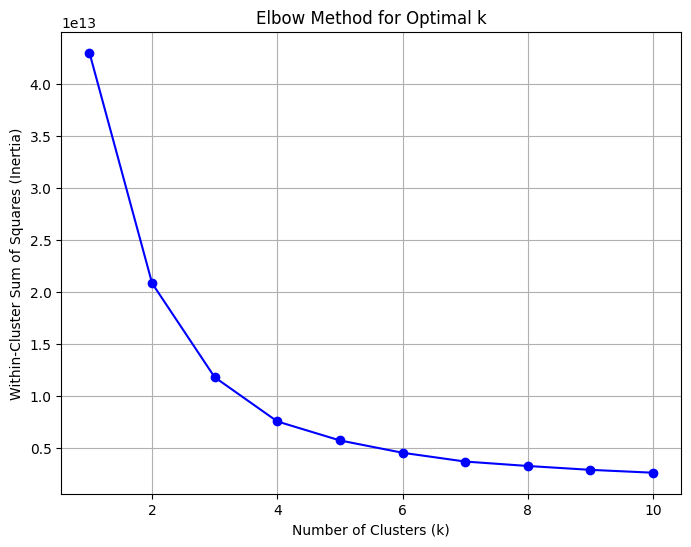

In [13]:
# Define a range of values for k (number of clusters)
k_values = range(1, 11)

# Initialize a list to store the within-cluster sum of squares (inertia) for each k
inertia_values = []

# Calculate the inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_for_clustering)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()

Inference drawn: The elbow point is at k = 3. This suggests that the optimal number of clusters for this data set is 3.

C:\Users\Novi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


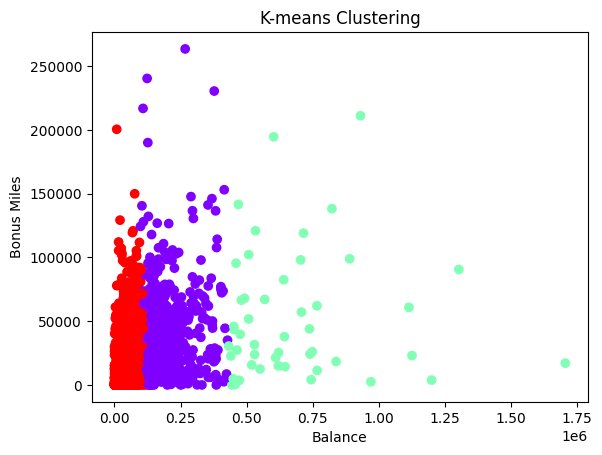

In [14]:
# Choose the number of clusters (you can change this value)
num_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(data_for_clustering)

# Add the cluster labels to the original DataFrame
df['Cluster_Label'] = kmeans.labels_

# Visualize the clusters (example using a scatter plot)
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['Cluster_Label'], cmap='rainbow')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('K-means Clustering')
plt.show()

Inference drawn from k-means Clustering:

- Two primary customer segments emerge: high bonus miles and high balance, and low bonus miles and low balance.

- High bonus miles and balance suggest frequent flyers with significant funds.

- Low bonus miles and balance imply less frequent flyers with lower funds.

- A few customers have low bonus miles but high balance, possibly non-frequent flyers with available funds.

Airlines can use this data to tailor marketing strategies.

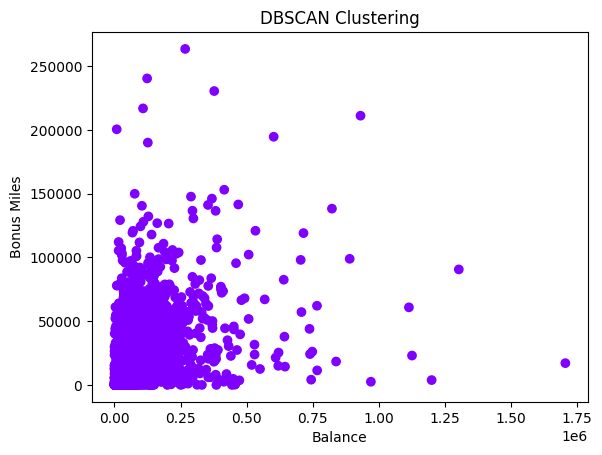

In [15]:
# Choose the epsilon (eps) and minimum samples (min_samples) parameters
eps = 0.5
min_samples = 5

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model to the data
dbscan.fit(data_for_clustering)

# Add the cluster labels to the original DataFrame
df['Cluster_Label'] = dbscan.labels_

# Visualize the clusters (example using a scatter plot)
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['Cluster_Label'], cmap='rainbow')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('DBSCAN Clustering')
plt.show()

Inferences from the DBSCAN clustering plot:

- Two main clusters are evident: one with high bonus miles and high balance, and another with low bonus miles and low balance.
- The high bonus miles and high balance cluster likely represents frequent flyers with substantial funds in their airline accounts.
- The low bonus miles and low balance cluster likely represents less frequent flyers with limited funds.

- A small group has low bonus miles but high balance, possibly non-frequent flyers

- Airlines can use this data for targeted marketing, offering upgrades and rewards to frequent flyers, and discounts or incentives to less frequent flyers.